In [66]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [67]:
data = pd.read_csv("Data/processed/Prepared_ighv_data.csv", index_col=0)

In [68]:
data.head()

,Phenotypes segregation,cg00000029,cg00000363,cg00001249,cg00001269,cg00001583,cg00001747,cg00001854,cg00001874,cg00002190,...,cg27661104,cg27662481,cg27662505,cg27663031,cg27663071,cg27663249,cg27664085,cg27664407,cg27664689,cg27664844
GSM4056740,0.0,0.057635,0.354353,0.433972,0.688887,0.517182,0.225309,0.095196,0.106635,0.383397,...,0.537107,0.127098,0.215972,0.479048,0.088706,0.465241,0.339083,0.051594,0.445298,0.099585
GSM4056718,0.0,0.953871,0.091226,0.452134,0.022800,0.228642,0.039757,0.063718,0.067420,0.092946,...,0.026241,0.153379,0.013760,0.056495,0.602235,0.478752,0.062978,0.505023,0.551180,0.111583
GSM4056710,0.0,0.449693,0.534821,0.955026,0.030618,0.433832,0.445046,0.067303,0.050488,0.418031,...,0.112542,0.857789,0.022296,0.543724,0.068229,0.958582,0.952190,0.473541,0.965129,0.249649
GSM4056713,0.0,0.885077,0.383795,0.422111,0.085304,0.126704,0.767489,0.275319,0.517630,0.538155,...,0.882050,0.561696,0.018676,0.532568,0.475753,0.670928,0.215293,0.474573,0.046021,0.573963
GSM4056732,0.0,0.912686,0.514823,0.422171,0.028561,0.130650,0.101693,0.054404,0.526072,0.110791,...,0.141594,0.517030,0.279730,0.545570,0.505435,0.042741,0.499660,0.848134,0.519053,0.399340


In [69]:
data_values = data.drop("Phenotypes segregation", axis=1)

In [70]:
# Projection 2d
tsne = TSNE(n_components=2, random_state=101, method="exact")

scaled_data_values = StandardScaler().fit_transform(data_values)
data_values_projection_2d = tsne.fit_transform(scaled_data_values)

In [74]:
res = {}

for _k in range(2, 6):
    km = KMeans(n_clusters=_k)
    km.fit(scaled_data_values)
    labels = km.labels_
    
    sc_score = metrics.silhouette_score(scaled_data_values, labels, random_state=101)
    inertia = km.inertia_
    
    res.update({f"Clusters {_k}": {"Silhouette score": sc_score, "Inertia": interia}})

In [75]:
c_metrics = pd.DataFrame.from_dict(res)
c_metrics

,Clusters 2,Clusters 3,Clusters 4,Clusters 5
Silhouette score,7.012416e-02,3.948782e-02,2.248581e-02,1.304238e-02
Inertia,1.693981e+07,1.693981e+07,1.693981e+07,1.693981e+07


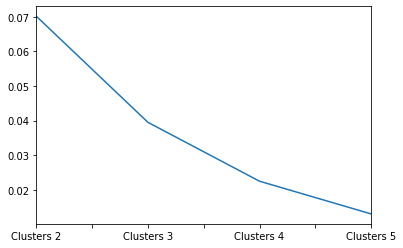

In [76]:
c_metrics.loc["Silhouette score", :].plot()

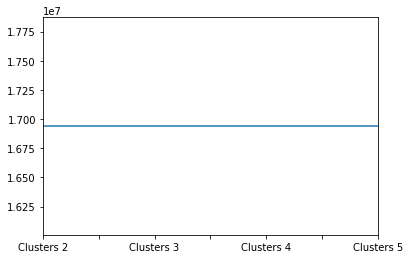

In [77]:
c_metrics.loc["Inertia", :].plot()

In [78]:
km = KMeans(n_clusters=2)
km.fit(scaled_data_values)

km_labels = km.labels_.reshape(-1, 1).astype(str)
km_data = np.concatenate((data_values_projection_2d, km_labels), axis=1)
km_data = pd.DataFrame(km_data, columns=["A", "B", "H"]).astype(float)

In [79]:
km_data.head()

,A,B,H
0,-151.42993,-90.149370,1.0
1,-158.31717,-58.014150,1.0
2,162.50482,-37.509106,1.0
3,-136.51537,-72.938220,1.0
4,142.92416,26.119421,0.0


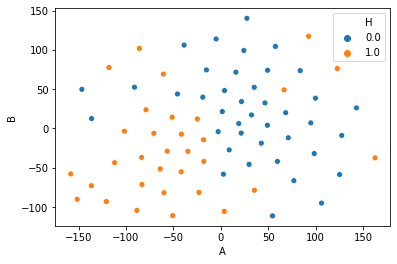

In [80]:
sns.scatterplot(data=km_data, x="A", y="B", hue="H")

In [81]:
# Save results from KMeans

In [82]:
labels = pd.Series(km_labels.ravel(), index=data_values.index, name="Phenotypes segregation")
data_values["Phenotypes segregation"] = labels

In [83]:
data_values.head()

,cg00000029,cg00000363,cg00001249,cg00001269,cg00001583,cg00001747,cg00001854,cg00001874,cg00002190,cg00002837,...,cg27662481,cg27662505,cg27663031,cg27663071,cg27663249,cg27664085,cg27664407,cg27664689,cg27664844,Phenotypes segregation
GSM4056740,0.057635,0.354353,0.433972,0.688887,0.517182,0.225309,0.095196,0.106635,0.383397,0.212720,...,0.127098,0.215972,0.479048,0.088706,0.465241,0.339083,0.051594,0.445298,0.099585,1
GSM4056718,0.953871,0.091226,0.452134,0.022800,0.228642,0.039757,0.063718,0.067420,0.092946,0.878406,...,0.153379,0.013760,0.056495,0.602235,0.478752,0.062978,0.505023,0.551180,0.111583,1
GSM4056710,0.449693,0.534821,0.955026,0.030618,0.433832,0.445046,0.067303,0.050488,0.418031,0.888696,...,0.857789,0.022296,0.543724,0.068229,0.958582,0.952190,0.473541,0.965129,0.249649,1
GSM4056713,0.885077,0.383795,0.422111,0.085304,0.126704,0.767489,0.275319,0.517630,0.538155,0.101842,...,0.561696,0.018676,0.532568,0.475753,0.670928,0.215293,0.474573,0.046021,0.573963,1
GSM4056732,0.912686,0.514823,0.422171,0.028561,0.130650,0.101693,0.054404,0.526072,0.110791,0.143653,...,0.517030,0.279730,0.545570,0.505435,0.042741,0.499660,0.848134,0.519053,0.399340,0


In [84]:
data_values = data_values.T

In [85]:
data_values.to_csv("Data/processed/IGHV_3_classes-clustered_KM.csv")